# Combine data from different sources: 

In [14]:
from bs_fdbck.constants import path_measurement_data

In [15]:
import pandas as pd
import numpy as np
import xarray as xr

### Input data:


In [16]:
path_sizedist_ATTO = path_measurement_data /'ATTO'#'sizedistrib' 

In [17]:
list(path_sizedist_ATTO.glob('*'))

[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/processed'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/QACSM_time_series_C4_60m_2014_2016STP_v3.xlsx'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/sizedistrib'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/meteo'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/ATTO_BC_Sara.xlsx'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/daily_median_QACSM_time_series_C4_60m_2014_2016STP_v3.csv'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/meteodataComplete.dat'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/ds_atto_2014_2019_4Sara.nc')]

In [37]:
path_acsm = path_measurement_data / 'ATTO'/ 'QACSM_time_series_C4_60m_2014_2016STP_v3.xlsx'
path_acsm2017 = path_measurement_data / 'ATTO'/ 'acsm_data_for_sara_2017.txt'

In [38]:
fn_theo = path_measurement_data / 'ATTO'/ 'ds_atto_2014_2019_4Sara.nc'

In [39]:
fn_meteo = path_measurement_data / 'ATTO'/ 'meteodataComplete.dat'
fn_meteo_dir = path_measurement_data / 'ATTO'/'meteo'# 'meteodataComplete.dat'

### Output data

In [40]:
postproc_data = path_measurement_data /'ATTO'/'processed'
postproc_data.mkdir( exist_ok=True)

path_acsm_daily_median = postproc_data /'daily_median_QACSM_time_series_C4_60m_2014_2016STP_v3.csv'

path_comb_data =postproc_data /'ATTO_data_comb_daily.nc'
path_comb_data_full_time =postproc_data /'ATTO_data_comb_hourly.nc'

In [22]:
path_comb_data_full_time

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/processed/ATTO_data_comb_hourly.nc')

### Read in acsm data

In [23]:
df_ATTO = pd.read_excel(path_acsm, sheet_name=0, index_col=0)#'QACSM 60m v3')

In [24]:
df_ATTO.index = df_ATTO.index.rename('time')

In [25]:
df_ATTO

,org (ug m-3),sul,nit,am,chl,BC MAAP
time,,,,,,
1/1/2014 0:00,NaN,NaN,NaN,NaN,NaN,NaN
1/1/2014 0:30,NaN,NaN,NaN,NaN,NaN,NaN
1/1/2014 1:00,NaN,NaN,NaN,NaN,NaN,NaN
1/1/2014 1:30,NaN,NaN,NaN,NaN,NaN,NaN
1/1/2014 2:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1/3/2017 11:00,NaN,NaN,NaN,NaN,NaN,0.037476
1/3/2017 11:30,NaN,NaN,NaN,NaN,NaN,0.045721
1/3/2017 12:00,NaN,NaN,NaN,NaN,NaN,0.049703


### Read in acsm data 2017

In [42]:
pd.read_csv(path_acsm2017, )#'QACSM 60m v3')

FileNotFoundError: [Errno 2] No such file or directory: '/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/acsm_data_for_sara_2017.txt'

In [24]:
df_ATTO.index = df_ATTO.index.rename('time')

In [25]:
df_ATTO

,org (ug m-3),sul,nit,am,chl,BC MAAP
time,,,,,,
1/1/2014 0:00,NaN,NaN,NaN,NaN,NaN,NaN
1/1/2014 0:30,NaN,NaN,NaN,NaN,NaN,NaN
1/1/2014 1:00,NaN,NaN,NaN,NaN,NaN,NaN
1/1/2014 1:30,NaN,NaN,NaN,NaN,NaN,NaN
1/1/2014 2:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1/3/2017 11:00,NaN,NaN,NaN,NaN,NaN,0.037476
1/3/2017 11:30,NaN,NaN,NaN,NaN,NaN,0.045721
1/3/2017 12:00,NaN,NaN,NaN,NaN,NaN,0.049703


## ATTO is at UTC - 4: convert to local time 

In [26]:
import datetime

In [27]:
df_ATTO.index

Index(['1/1/2014 0:00', '1/1/2014 0:30', '1/1/2014 1:00', '1/1/2014 1:30',
       '1/1/2014 2:00', '1/1/2014 2:30', '1/1/2014 3:00', '1/1/2014 3:30',
       '1/1/2014 4:00', '1/1/2014 4:30',
       ...
       '1/3/2017 8:30', '1/3/2017 9:00', '1/3/2017 9:30', '1/3/2017 10:00',
       '1/3/2017 10:30', '1/3/2017 11:00', '1/3/2017 11:30', '1/3/2017 12:00',
       '1/3/2017 12:30', '1/3/2017 13:00'],
      dtype='object', name='time', length=52731)

In [28]:
time_ind = pd.to_datetime(df_ATTO.index)# -datetime.timedelta(hours=4)

In [29]:
time_ind_local_time = time_ind - datetime.timedelta(hours=4)
time_ind_local_time

DatetimeIndex(['2013-12-31 20:00:00', '2013-12-31 20:30:00',
               '2013-12-31 21:00:00', '2013-12-31 21:30:00',
               '2013-12-31 22:00:00', '2013-12-31 22:30:00',
               '2013-12-31 23:00:00', '2013-12-31 23:30:00',
               '2014-01-01 00:00:00', '2014-01-01 00:30:00',
               ...
               '2017-01-03 04:30:00', '2017-01-03 05:00:00',
               '2017-01-03 05:30:00', '2017-01-03 06:00:00',
               '2017-01-03 06:30:00', '2017-01-03 07:00:00',
               '2017-01-03 07:30:00', '2017-01-03 08:00:00',
               '2017-01-03 08:30:00', '2017-01-03 09:00:00'],
              dtype='datetime64[ns]', name='time', length=52731, freq=None)

In [30]:
df_ATTO.index = time_ind_local_time

In [31]:
df_ATTO_daily_med = df_ATTO.resample('1D').median()

<AxesSubplot:xlabel='time'>

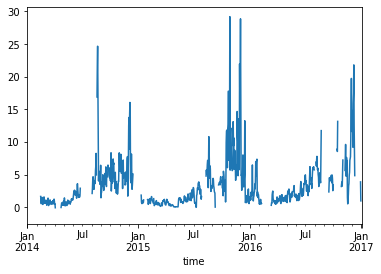

In [32]:
df_ATTO_daily_med['org (ug m-3)'].plot()

In [33]:
df_ATTO_daily_med['org (ug m-3)']

time
2013-12-31         NaN
2014-01-01         NaN
2014-01-02         NaN
2014-01-03         NaN
2014-01-04         NaN
                ...   
2016-12-30    3.880180
2016-12-31    0.968279
2017-01-01         NaN
2017-01-02         NaN
2017-01-03         NaN
Freq: D, Name: org (ug m-3), Length: 1100, dtype: float64

In [34]:
df_ATTO_daily_med = df_ATTO_daily_med.rename({'org (ug m-3)':'Org'}, axis=1)

In [35]:
df_ATTO_daily_med.to_csv(path_acsm_daily_median)

## Data from Theodore

In [149]:
ds = xr.open_dataset(fn_theo, engine='netcdf4')
ds['timeUTC-3'] = ds['time'].copy()

In [150]:
ds


<xarray.Dataset>
Dimensions:                (D: 104, time: 25448, time_traj: 121)
Coordinates:
  * D                      (D) float64 10.2 10.6 10.9 11.3 ... 385.4 399.5 414.2
  * time                   (time) datetime64[ns] 2014-03-10T16:00:00 ... 2019...
  * time_traj              (time_traj) int64 0 1 2 3 4 5 ... 116 117 118 119 120
Data variables: (12/20)
    pnsd                   (time, D) float64 ...
    Pressure               (time, time_traj) float64 ...
    Potential_Temperature  (time, time_traj) float64 ...
    Temperature            (time, time_traj) float64 ...
    Rainfall               (time, time_traj) float64 ...
    Mixing_Depth           (time, time_traj) float64 ...
    ...                     ...
    condensation_sink      (time) float64 ...
    pnsd_nolog             (time, D) float64 ...
    N50                    (time) float64 ...
    N100                   (time) float64 ...
    N200                   (time) float64 ...
    timeUTC-3              (time) datetime64[ns] 2014-03-10T16:00:00 ... 2019...

### Recalculate N50, N100 etc

In [151]:
from bs_fdbck.util.EBAS_data.sizedistribution_integration import calc_Nx_interpolate_first

In [152]:
for x in [50,100,200]:
    ds[f'N{x}_new']=calc_Nx_interpolate_first(ds, x=x,
                              var_diam='D',
                              v_dNdlog10D='pnsd')



/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/missing.py:559: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/missing.py:560: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/missing.py:559: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/missing.py:560: 

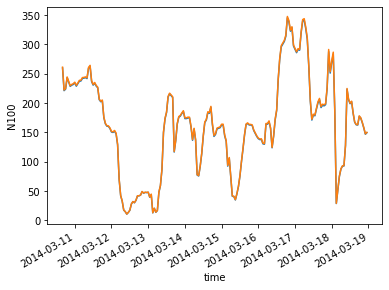

In [153]:
ds['N100_new'].isel(time=slice(0,200)).plot()


ds['N100'].isel(time=slice(0,200)).plot()


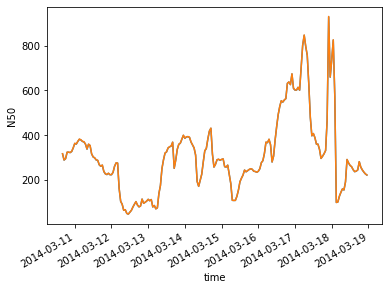

In [154]:
ds['N50_new'].isel(time=slice(0,200)).plot()


ds['N50'].isel(time=slice(0,200)).plot()


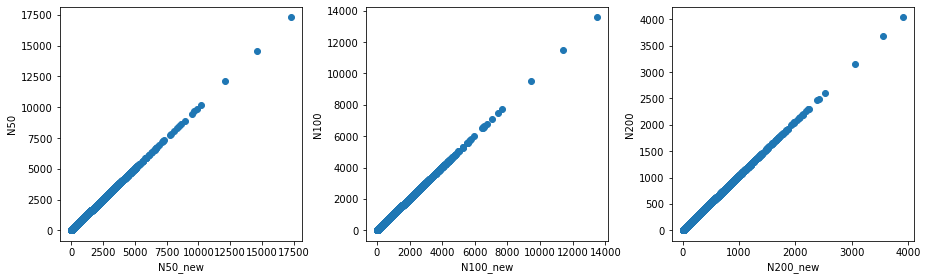

In [155]:
fig, axs = plt.subplots(1,3, figsize=[13,4])

for i,v in enumerate(['N50','N100','N200']):
    ax = axs[i]
    ds.plot.scatter(x=f'{v}_new', y=v,  ax = ax)
    #ax.set_yscale('log')
    #ax.set_xscale('log')
fig.tight_layout()

## Replace old values (even though the same) 

In [156]:
for i,v in enumerate(['N50','N100','N200']):
    ds[v] = ds[f'{v}_new']


In [157]:
import matplotlib.pyplot as plt

## Add meteo data 2:

In [158]:
def replace_no(x):
    if len(x)==0:
        return '0'
    else:
        return x

def make_datetime(_df):
    _df['hour'] = _df['Time'].apply(lambda x:replace_no(str(x)[:-2])).astype(int)

    _df['minute'] = _df['Time'].apply(lambda x: replace_no(str(x)[-2:])).astype(int)
    _df['year'] = _df['Yr']
    _df['day'] = _df['Timestamps'].apply(lambda x: int(x.split('.')[0]))
    _df['month'] = _df['Timestamps'].apply(lambda x: int(x.split('.')[1]))

    return pd.to_datetime(_df[['minute', 'hour', 'month','day','year']])

In [159]:
fl = list(fn_meteo_dir.glob('*.txt'))
fl.sort()
fl

[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/meteo/35_INST_aws_precertified_30min_2014.txt'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/meteo/35_INST_aws_precertified_30min_2015.txt'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/meteo/35_INST_aws_precertified_30min_2016.txt'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/meteo/35_INST_aws_precertified_30min_2017.txt'),
 PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/meteo/35_INST_aws_precertified_30min_2018.txt')]

In [160]:
f = fl[0]
ls_met_df = list()
for f in fl:
    _df = pd.read_csv(f, sep='\t', decimal=",")
    _df['TimeUTC'] =make_datetime(_df) 
    _df = _df.set_index('TimeUTC')
    ls_met_df.append(_df)

In [161]:
df_meteo2 = pd.concat(ls_met_df)

In [162]:
df_meteo2 = df_meteo2.replace(-9999.,np.nan)

<AxesSubplot:xlabel='TimeUTC'>

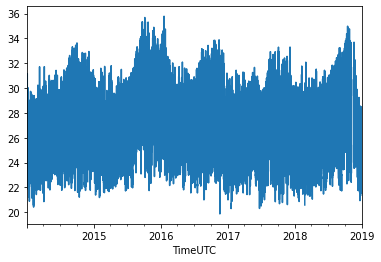

In [163]:
df_meteo2['T_81m'].plot()

### Add meteo data:

In [164]:
df_met = pd.read_csv(fn_meteo, sep='\t', index_col=0)

In [165]:
df_met = df_met.replace(9999,np.nan).rename({' temperature':'temperature'}, axis=1)

In [166]:
df_met.index = pd.to_datetime(df_met.index)

<AxesSubplot:xlabel='TimeUTC'>

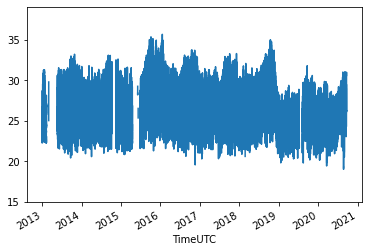

In [167]:
df_met['temperature'].plot()

<AxesSubplot:xlabel='TimeUTC'>

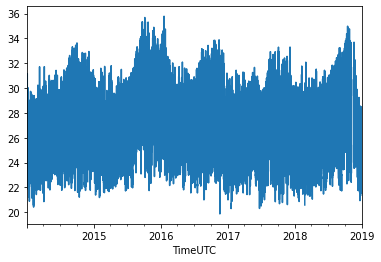

In [168]:
df_meteo2['T_81m'].plot()

In [169]:
vars_to_add_meteo = ['pressure', 'temperature', 'humidity', 'wind_dir', 'precip',
       'Solar_inc_Wm2', 'Solar_out_Wm2', 'wind_speed', 'wind_speed_v']


In [170]:
df_meteo2.columns

Index(['Timestamps', 'Yr', 'Doy', 'Time', 'T_81m', 'T_73m', 'T_55m', 'T_40m',
       'T_36m', 'T_26m', 'T_12m', 'T_4m', 'T_1.5m', 'T_0.4m', 'RH_81m',
       'RH_73m', 'RH_55m', 'RH_40m', 'RH_36m', 'RH_26m', 'RH_12m', 'RH_4m',
       'RH_1.5m', 'RH_0.4m', 'SW_in', 'SW_out', 'PAR_in', 'PAR_out', 'UV',
       'NetRad', 'AirPress_81m', 'Rainfall', 'WSp_73m', 'WDir_73m', 'WSp_65m',
       'WDir_65m', 'WSp_50m', 'WDir_50m', 'WSp_42m', 'WDir_42m', 'WSp_26m',
       'WDir_26m', 'WSp_19m', 'WDir_19m', 'LW_atm', 'LW_terr', 'hour',
       'minute', 'year', 'day', 'month'],
      dtype='object')

In [171]:
vars_to_add_meteo2 = ['AirPress_81m', 'T_81m', 'RH_81m', 'WSp_73m','WDir_73m' ,'Rainfall',
       'PAR_in', 'PAR_out',  'LW_atm', 'LW_terr',]

dic_old2new_metfile=dict(
    AirPress_81m = 'pressure',
    T_81m = 'temperature',
    RH_81m='humidity',
    Rainfall='precip',
    
    
)

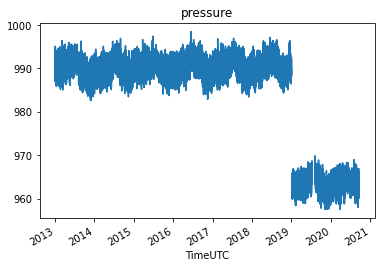

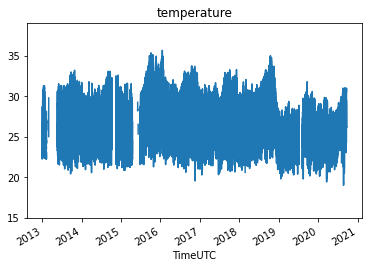

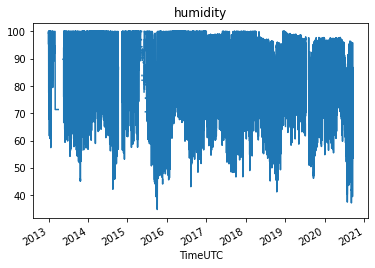

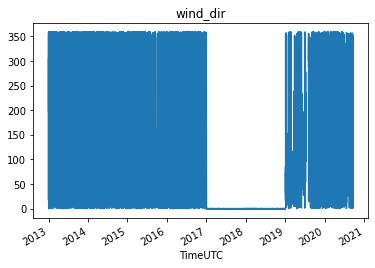

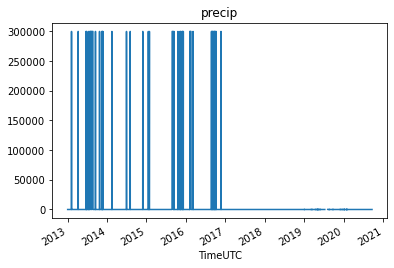

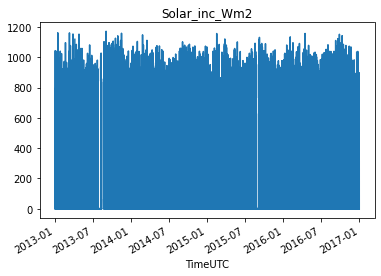

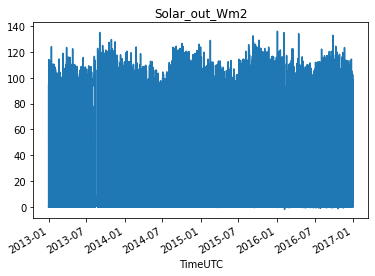

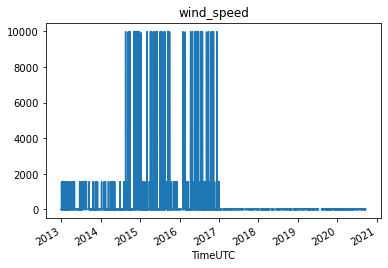

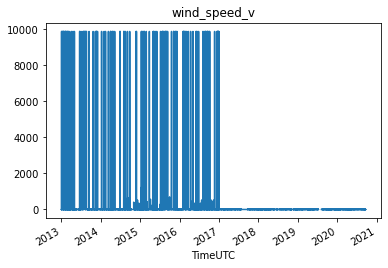

In [172]:

for v in vars_to_add_meteo:
    df_met[v].plot()
    plt.title(v)
    plt.show()

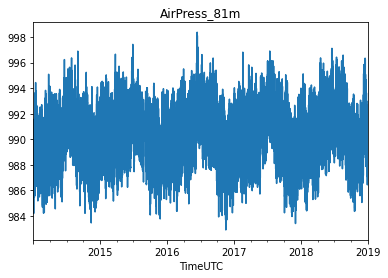

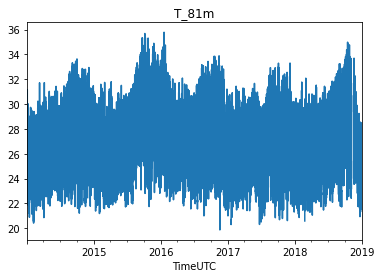

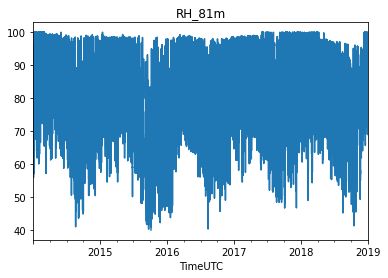

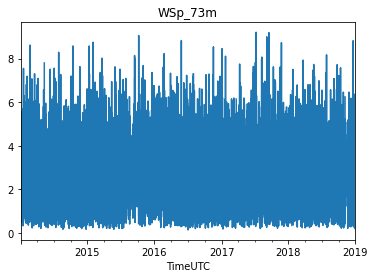

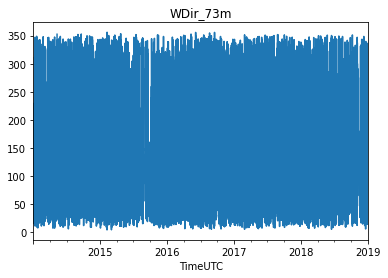

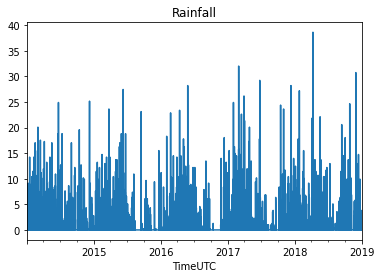

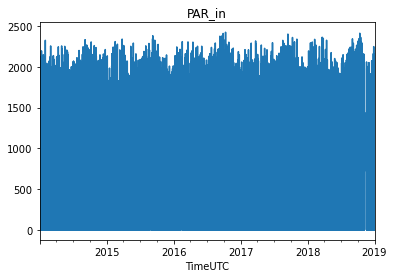

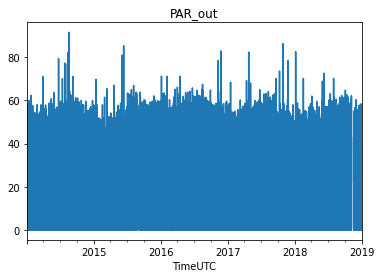

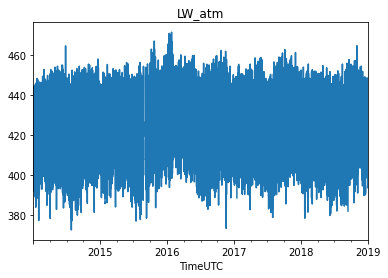

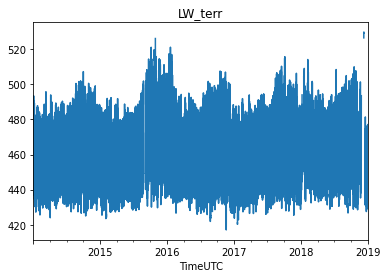

In [173]:

for v in vars_to_add_meteo2:
    df_meteo2[v].plot()
    plt.title(v)
    plt.show()

<AxesSubplot:xlabel='TimeUTC'>

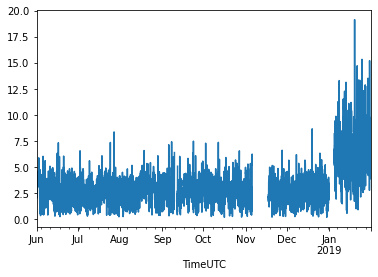

In [174]:
df_met['wind_speed'].loc['2018-06':'2019-01'].plot()

<AxesSubplot:xlabel='TimeUTC'>

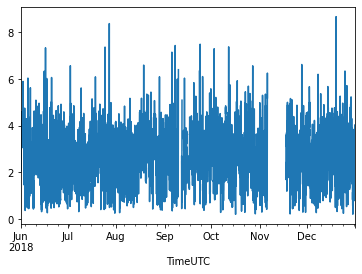

In [175]:
df_met['wind_speed'].loc['2018-06':'2018-12'].plot()

<AxesSubplot:xlabel='TimeUTC'>

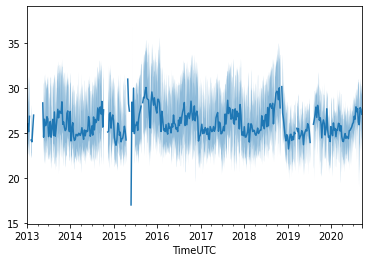

In [176]:
ts = df_met['temperature']
ma = ts.resample('1d').max()#.plot(alpha=0.5, label='ECHAM-SALSA', c='r')
mi = ts.resample('1d').min()#.plot(alpha=0.5, label='ECHAM-SALSA', c='r')
plt.fill_between(ma.index, mi, ma,alpha=0.5, label='ECHAM-SALSA')
ts.resample('7d').mean().plot()

<AxesSubplot:xlabel='TimeUTC'>

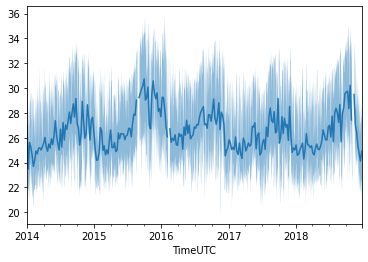

In [177]:
ts = df_meteo2['T_81m']
ma = ts.resample('1d').max()#.plot(alpha=0.5, label='ECHAM-SALSA', c='r')
mi = ts.resample('1d').min()#.plot(alpha=0.5, label='ECHAM-SALSA', c='r')
plt.fill_between(ma.index, mi, ma,alpha=0.5, label='ECHAM-SALSA')
ts.resample('7d').mean().plot()

## Due to the change in the position of the instrument, we only use data up until end of 2018 (which is also when the model runs stop)

In [178]:
df_met = df_met.loc['2012-01':'2018-12']

In [179]:
df_met.loc[df_met['wind_speed']>100, 'wind_speed'] = np.nan
df_met.loc[df_met['wind_speed_v']>100,'wind_speed_v'] = np.nan

In [180]:
df_met.loc[df_met['precip']>4000,'precip'] = np.nan
#.plot()

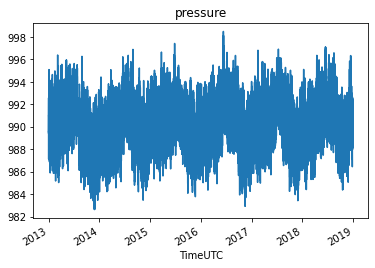

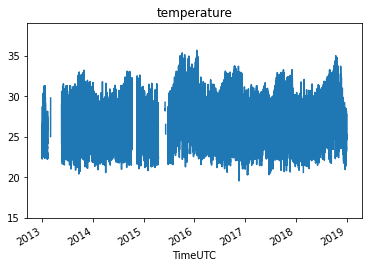

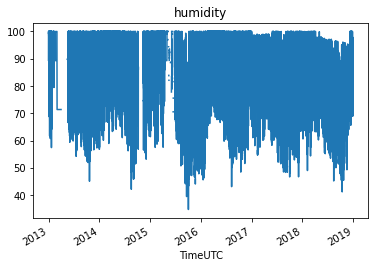

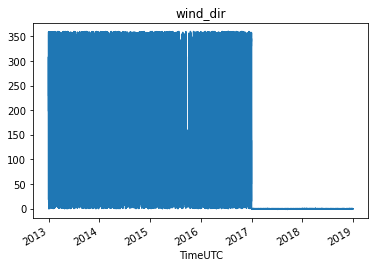

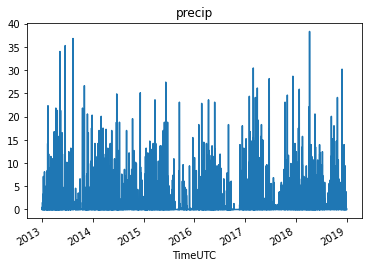

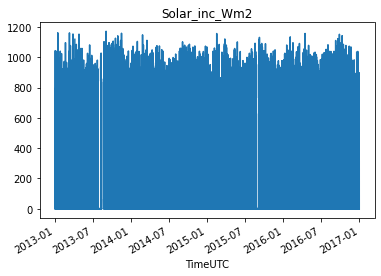

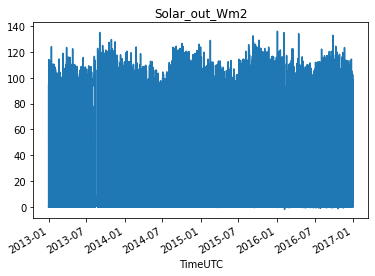

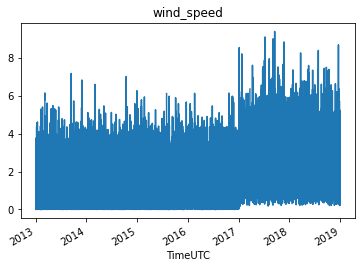

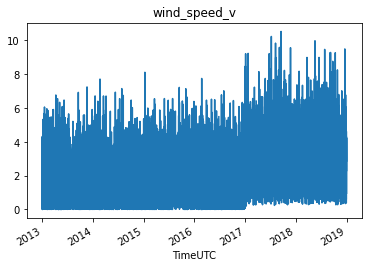

In [181]:

for v in vars_to_add_meteo:
    df_met[v].plot()
    plt.title(v)
    plt.show()

### Check timezone meteo2:

<AxesSubplot:xlabel='TimeUTC'>

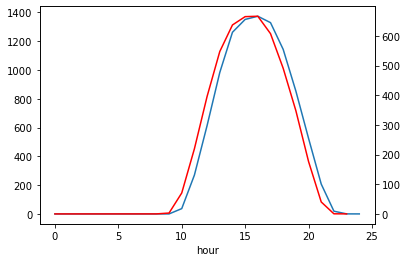

In [182]:
fig, ax = plt.subplots()
df_meteo2.groupby('hour').mean()['PAR_in'].plot()
df_met.loc['2014-01':'2019-01'].groupby(df_met.loc['2014-01':'2019-01'].index.hour).mean()['Solar_inc_Wm2'].plot(ax = ax.twinx(), c='r')


<AxesSubplot:xlabel='TimeUTC'>

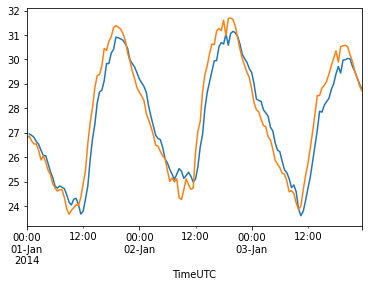

In [183]:
df_meteo2.loc['2014-01-01':'2014-01-03']['T_81m'].plot()
df_met.loc['2014-01-01':'2014-01-03']['temperature'].plot()

<AxesSubplot:xlabel='TimeUTC'>

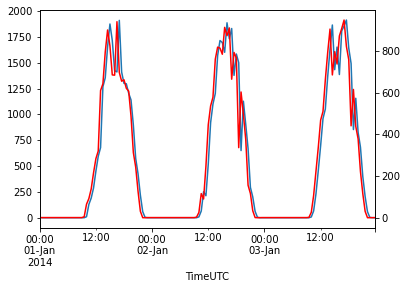

In [184]:
fig, ax = plt.subplots()

df_meteo2.loc['2014-01-01':'2014-01-03']['PAR_in'].plot()
df_met.loc['2014-01-01':'2014-01-03']['Solar_inc_Wm2'].plot(ax=ax.twinx(), c='r')

Half an hour difference due to right verus left labeling of timestep

#### Go from UTC time to local time

In [185]:
df_met = df_met.reset_index()
df_met['TimeLocal'] = pd.to_datetime(df_met['TimeUTC']) - datetime.timedelta(hours=4)

df_met = df_met.set_index('TimeLocal')


In [186]:
df_meteo2 = df_meteo2.reset_index()
df_meteo2['TimeLocal'] = pd.to_datetime(df_meteo2['TimeUTC']) - datetime.timedelta(hours=4)

df_meteo2 = df_meteo2.set_index('TimeLocal')


In [187]:
df_met['hour'] = df_met.index.hour

In [188]:
df_meteo2['hour'] = df_meteo2.index.hour

In [189]:
df_met['temperature']

TimeLocal
2012-12-31 20:00:00    24.028000
2012-12-31 20:30:00    24.003000
2012-12-31 21:00:00    23.782000
2012-12-31 21:30:00    23.742000
2012-12-31 22:00:00    23.698000
                         ...    
2018-12-31 17:30:00    26.719333
2018-12-31 18:00:00    26.081000
2018-12-31 18:30:00    25.232000
2018-12-31 19:00:00    24.567333
2018-12-31 19:30:00    25.272333
Name: temperature, Length: 105167, dtype: float64

In [190]:
df_meteo2['T_81m']

TimeLocal
2013-12-31 20:30:00    26.95
2013-12-31 21:00:00    26.89
2013-12-31 21:30:00    26.81
2013-12-31 22:00:00    26.64
2013-12-31 22:30:00    26.52
                       ...  
2018-12-31 18:00:00    26.71
2018-12-31 18:30:00    26.05
2018-12-31 19:00:00    25.21
2018-12-31 19:30:00    24.57
2018-12-31 20:00:00    25.29
Name: T_81m, Length: 87648, dtype: float64

In [191]:
df_met.columns

Index(['TimeUTC', 'pressure', 'temperature', 'humidity', 'wind_dir', 'precip',
       'Solar_inc_Wm2', 'Solar_out_Wm2', 'wind_speed', 'wind_speed_v', 'hour'],
      dtype='object')

<AxesSubplot:xlabel='hour'>

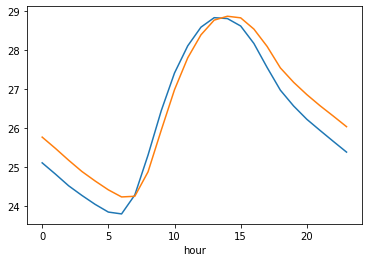

In [192]:
df_met_daily_med = df_met.resample('D').median()

df_met_daily_cycle = df_met.groupby(df_met['hour']).mean()

df_met_daily_cycle['temperature'].plot()

df_met_daily_med = df_meteo2.resample('D').median()

df_met_daily_cycle = df_meteo2.groupby(df_meteo2['hour']).mean()

df_met_daily_cycle['T_81m'].plot()

## Seems like Theos data is UTC-3, so we shift all to -4

In [193]:
ds['timeUTC'] = pd.to_datetime(ds['timeUTC-3']) + datetime.timedelta(hours=3)
ds['timeUTC-4'] = pd.to_datetime(ds['timeUTC']) - datetime.timedelta(hours=4)

ds['time'] = ds['timeUTC-4'].values

In [194]:
ds

<xarray.Dataset>
Dimensions:                (D: 104, time: 25448, time_traj: 121, limit: 2, timeUTC: 25448, timeUTC-4: 25448)
Coordinates:
  * D                      (D) float64 10.2 10.6 10.9 11.3 ... 385.4 399.5 414.2
  * time                   (time) datetime64[ns] 2014-03-10T15:00:00 ... 2019...
  * time_traj              (time_traj) int64 0 1 2 3 4 5 ... 116 117 118 119 120
  * limit                  (limit) <U6 'bottom' 'top'
  * timeUTC                (timeUTC) datetime64[ns] 2014-03-10T19:00:00 ... 2...
  * timeUTC-4              (timeUTC-4) datetime64[ns] 2014-03-10T15:00:00 ......
Data variables: (12/29)
    pnsd                   (time, D) float64 ...
    Pressure               (time, time_traj) float64 ...
    Potential_Temperature  (time, time_traj) float64 ...
    Temperature            (time, time_traj) float64 ...
    Rainfall               (time, time_traj) float64 ...
    Mixing_Depth           (time, time_traj) float64 ...
    ...                     ...
    diam_lims              (limit, D) float64 10.01 10.4 10.75 ... 406.8 421.8
    dlog10D                (D) float64 0.01671 0.01441 ... 0.01565 0.01569
    dN                     (time, D) float64 1.138e-06 0.02022 ... 0.8689 0.3272
    N50_new                (time) float64 316.4 288.4 294.9 ... 7.112 1.091
    N100_new               (time) float64 259.8 221.1 223.7 ... 4.941 1.091
    N200_new               (time) float64 123.4 102.3 104.5 ... 1.552 1.091

In [195]:
_ds = ds.groupby('time.hour').mean()

In [196]:
ds['hour'] = ds['time.hour']

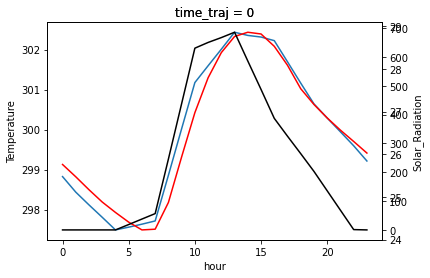

In [197]:
f,ax = plt.subplots()
ds['Temperature'].isel(time_traj=0).groupby(ds['hour']).mean().plot()

df_met_daily_cycle['T_81m'].plot(ax = ax.twinx(), c='r')

ds['Solar_Radiation'].isel(time_traj=0).groupby(ds['hour']).mean().plot(ax = ax.twinx(), c='k')


### Rename reanalysis variables and add meteo variables to final dataset

In [198]:
ds = ds.rename(dict(
    Pressure='Pressure_reanalysis',
    Temperature='Temperature_reanalysis',
    Potential_Temperature='Potential_Temperature_reanalysis',
    Specific_Humidity = 'Specific_Humidity_reanalysis',
    
    
))
ds = ds.rename(dict(
    N50='N50-500',
    N100 ='N100-500',
    N200 ='N200-500',
))

from_dt = ds['time'].isel(time=0).values
to_dt = ds['time'].isel(time=-1).values


for v in vars_to_add_meteo:
    xa = xr.DataArray(df_met[v]).rename(dict(TimeLocal='time'))
    ds[v] = xa.sel(time=slice(from_dt, to_dt))

In [199]:
df_met

,TimeUTC,pressure,temperature,humidity,wind_dir,precip,Solar_inc_Wm2,Solar_out_Wm2,wind_speed,wind_speed_v,hour
TimeLocal,,,,,,,,,,,
2012-12-31 20:00:00,2013-01-01 00:00:00,989.650000,24.028000,99.343000,199.290000,0.0,0.0,0.0,1.238343,0.433419,20
2012-12-31 20:30:00,2013-01-01 00:30:00,989.830000,24.003000,99.533000,239.720000,0.0,0.0,0.0,0.470277,0.805427,20
2012-12-31 21:00:00,2013-01-01 01:00:00,990.110000,23.782000,99.727000,257.590000,0.0,0.0,0.0,0.336048,1.527164,21
2012-12-31 21:30:00,2013-01-01 01:30:00,990.410000,23.742000,100.000000,265.830000,0.0,0.0,0.0,0.091455,1.254370,21
2012-12-31 22:00:00,2013-01-01 02:00:00,990.390000,23.698000,99.930000,308.420000,0.0,0.0,0.0,0.665729,0.839338,22
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 17:30:00,2018-12-31 21:30:00,988.864537,26.719333,79.080333,-0.080146,0.0,NaN,NaN,2.082000,2.206203,17
2018-12-31 18:00:00,2018-12-31 22:00:00,988.954417,26.081000,82.218333,-0.125967,0.0,NaN,NaN,2.668667,2.705537,18
2018-12-31 18:30:00,2018-12-31 22:30:00,989.126653,25.232000,86.443333,-0.105181,0.0,NaN,NaN,2.428333,2.482536,18


In [200]:
from_dt = ds['time'].isel(time=0).values
to_dt = ds['time'].isel(time=-1).values


for v in vars_to_add_meteo2:
    xa = xr.DataArray(df_meteo2[v]).rename(dict(TimeLocal='time'))
    if v in dic_old2new_metfile:
        vo = dic_old2new_metfile[v]
        print(f'renaming {v} to {vo}')
        ds[vo] = xa.sel(time=slice(from_dt, to_dt))
    else:
        ds[v] = xa.sel(time=slice(from_dt, to_dt))
        

renaming AirPress_81m to pressure
renaming T_81m to temperature
renaming RH_81m to humidity
renaming Rainfall to precip


In [201]:
vo


'precip'

In [202]:
v

'LW_terr'

In [203]:
ds_stat = ds.sel(time_traj = 0)

In [204]:
ds_stat_day = ds_stat.resample({'time':'D'}).median()

In [205]:
ds_stat_day = ds_stat_day.assign({'Org':df_ATTO_daily_med.to_xarray()['Org']})

## Check how well Reanalis temperature fits

In [206]:
ds

<xarray.Dataset>
Dimensions:                           (time: 25448, D: 104, time_traj: 121, limit: 2, timeUTC: 25448, timeUTC-4: 25448)
Coordinates:
  * time                              (time) datetime64[ns] 2014-03-10T15:00:...
  * D                                 (D) float64 10.2 10.6 10.9 ... 399.5 414.2
  * time_traj                         (time_traj) int64 0 1 2 3 ... 118 119 120
  * limit                             (limit) <U6 'bottom' 'top'
  * timeUTC                           (timeUTC) datetime64[ns] 2014-03-10T19:...
  * timeUTC-4                         (timeUTC-4) datetime64[ns] 2014-03-10T1...
Data variables: (12/40)
    pnsd                              (time, D) float64 ...
    Pressure_reanalysis               (time, time_traj) float64 ...
    Potential_Temperature_reanalysis  (time, time_traj) float64 ...
    Temperature_reanalysis            (time, time_traj) float64 ...
    Rainfall                          (time, time_traj) float64 ...
    Mixing_Depth                      (time, time_traj) float64 ...
    ...                                ...
    WDir_73m                          (time) float64 56.47 93.43 ... nan nan
    precip                            (time) float64 0.0 0.0 0.0 ... nan nan nan
    PAR_in                            (time) float64 1.676e+03 826.7 ... nan nan
    PAR_out                           (time) float64 47.3 25.72 7.79 ... nan nan
    LW_atm                            (time) float64 434.7 446.8 ... nan nan
    LW_terr                           (time) float64 494.9 490.3 ... nan nan

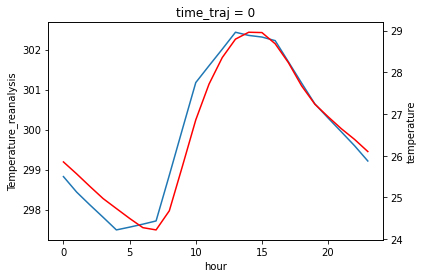

In [207]:
f,ax = plt.subplots()
ds['Temperature_reanalysis'].isel(time_traj=0).groupby(ds['hour']).mean().plot()
ds['temperature'].groupby(ds['hour']).mean().plot(ax = ax.twinx(), c='r')


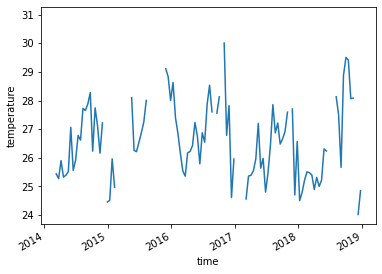

In [208]:
ds['temperature'].resample(time='14d').mean().plot()

In [209]:
ds

<xarray.Dataset>
Dimensions:                           (time: 25448, D: 104, time_traj: 121, limit: 2, timeUTC: 25448, timeUTC-4: 25448)
Coordinates:
  * time                              (time) datetime64[ns] 2014-03-10T15:00:...
  * D                                 (D) float64 10.2 10.6 10.9 ... 399.5 414.2
  * time_traj                         (time_traj) int64 0 1 2 3 ... 118 119 120
  * limit                             (limit) <U6 'bottom' 'top'
  * timeUTC                           (timeUTC) datetime64[ns] 2014-03-10T19:...
  * timeUTC-4                         (timeUTC-4) datetime64[ns] 2014-03-10T1...
Data variables: (12/40)
    pnsd                              (time, D) float64 ...
    Pressure_reanalysis               (time, time_traj) float64 ...
    Potential_Temperature_reanalysis  (time, time_traj) float64 ...
    Temperature_reanalysis            (time, time_traj) float64 ...
    Rainfall                          (time, time_traj) float64 ...
    Mixing_Depth                      (time, time_traj) float64 ...
    ...                                ...
    WDir_73m                          (time) float64 56.47 93.43 ... nan nan
    precip                            (time) float64 0.0 0.0 0.0 ... nan nan nan
    PAR_in                            (time) float64 1.676e+03 826.7 ... nan nan
    PAR_out                           (time) float64 47.3 25.72 7.79 ... nan nan
    LW_atm                            (time) float64 434.7 446.8 ... nan nan
    LW_terr                           (time) float64 494.9 490.3 ... nan nan

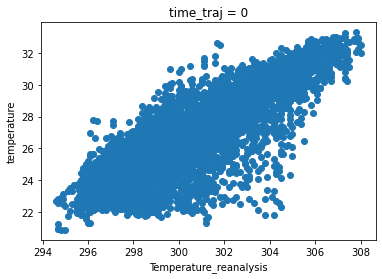

In [210]:
ds.isel(time_traj=0).sel(time=slice('2014','2014')).plot.scatter(x='Temperature_reanalysis', y = 'temperature')

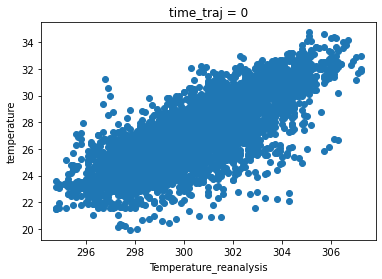

In [211]:
ds.isel(time_traj=0).sel(time=slice('2016-01','2016')).plot.scatter(x='Temperature_reanalysis', y = 'temperature')

In [212]:
ds_stat_day.to_netcdf(path_comb_data)

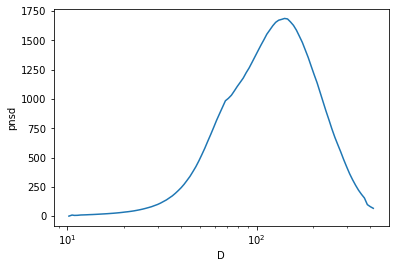

In [213]:
ds['pnsd'].mean('time').plot(xscale='log')

In [214]:
ds_nx = ds_stat_day

<AxesSubplot:xlabel='time'>

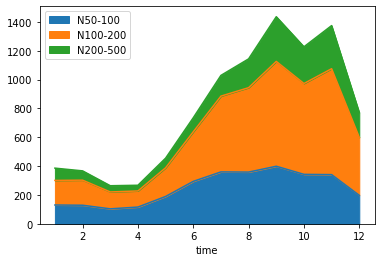

In [215]:
ds_nx['N50-100'] = ds_nx['N50-500']-ds_nx['N100-500']
ds_nx['N100-200'] = ds_nx['N100-500']-ds_nx['N200-500']
_df = ds_nx[['N50-100','N100-200','N200-500']].to_dataframe().drop('time_traj', axis=1)

_df.groupby(_df.index.month).median().plot(kind='area', stacked='true',)#, alpha=.2)



In [216]:
ds['N50-500'].mean('time')

<xarray.DataArray 'N50-500' ()>
array(924.90856412)

In [217]:
ds

<xarray.Dataset>
Dimensions:                           (time: 25448, D: 104, time_traj: 121, limit: 2, timeUTC: 25448, timeUTC-4: 25448)
Coordinates:
  * time                              (time) datetime64[ns] 2014-03-10T15:00:...
  * D                                 (D) float64 10.2 10.6 10.9 ... 399.5 414.2
  * time_traj                         (time_traj) int64 0 1 2 3 ... 118 119 120
  * limit                             (limit) <U6 'bottom' 'top'
  * timeUTC                           (timeUTC) datetime64[ns] 2014-03-10T19:...
  * timeUTC-4                         (timeUTC-4) datetime64[ns] 2014-03-10T1...
Data variables: (12/40)
    pnsd                              (time, D) float64 6.811e-05 ... 20.85
    Pressure_reanalysis               (time, time_traj) float64 ...
    Potential_Temperature_reanalysis  (time, time_traj) float64 ...
    Temperature_reanalysis            (time, time_traj) float64 ...
    Rainfall                          (time, time_traj) float64 ...
    Mixing_Depth                      (time, time_traj) float64 ...
    ...                                ...
    WDir_73m                          (time) float64 56.47 93.43 ... nan nan
    precip                            (time) float64 0.0 0.0 0.0 ... nan nan nan
    PAR_in                            (time) float64 1.676e+03 826.7 ... nan nan
    PAR_out                           (time) float64 47.3 25.72 7.79 ... nan nan
    LW_atm                            (time) float64 434.7 446.8 ... nan nan
    LW_terr                           (time) float64 494.9 490.3 ... nan nan

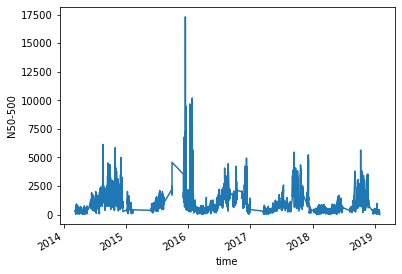

In [218]:
ds['N50-500'].plot()

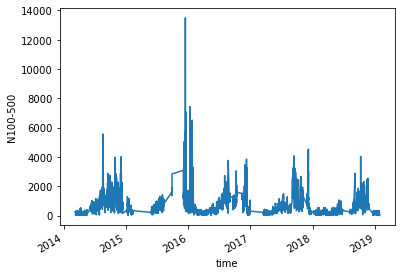

In [219]:
ds['N100-500'].plot()

In [220]:
ds['N100-500'].mean('time')

<xarray.DataArray 'N100-500' ()>
array(632.36555509)

In [221]:
ds['N200-500'].mean('time')

<xarray.DataArray 'N200-500' ()>
array(170.34908289)

### Add ACSM data: 

In [222]:
ds = ds.assign({'OA':df_ATTO['org (ug m-3)'].resample('h').mean()})

(-10.0, 40.0)

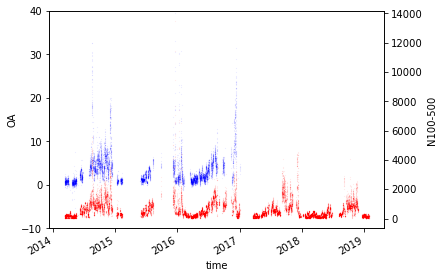

In [223]:
fig, ax = plt.subplots()
ds['OA'].plot(c = 'b', alpha=0.5, marker='.', linewidth=0, markersize=.1)

ds['N100-500'].plot(ax = ax.twinx(),c = 'r', alpha=0.5, marker='.', linewidth=0, markersize=.1)
ax.set_ylim([-10,40])

## Save dataset

In [226]:
ds.to_netcdf(path_comb_data_full_time)

In [227]:
ds = xr.open_dataset(path_comb_data_full_time)

In [ ]:
ds

## Extra